In [9]:
import pandas as pd
import sklearn as sl


#### load the diabetes dataset
* https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download

In [11]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Split the dataset

In [12]:
from sklearn.model_selection import train_test_split

#### the explanatory variable 

In [13]:
X = df.iloc[:,0:8]

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#### the predict variable 

In [15]:
y = df.iloc[:,8]

In [16]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#### call the split method

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=123)

#### Applying Logistic Regression Algorithm and Prediction

In [19]:
from sklearn.linear_model import LogisticRegression

#### initiate the model

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
logreg = LogisticRegression()

#### fitting the model

In [24]:
logreg.fit(X_train,y_train)

LogisticRegression()

#### create a new variable 

In [25]:
y_pred = logreg.predict(X_test)

#### import  accuracy_score

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred)

0.7965367965367965

#### import RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

#### initiate the model

In [29]:
rfc = RandomForestClassifier()

#### fit the model

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

#### lets do the prediction

In [31]:
y_rfc_pred = rfc.predict(X_test)

In [32]:
accuracy_score(y_test,y_rfc_pred)

0.7922077922077922

### K-Fold Cross Validation for improving the output

In [40]:
from sklearn.model_selection import GridSearchCV

#### initiate the model

In [34]:
log_reg = LogisticRegression()

In [41]:
grid = GridSearchCV(log_reg, {'penalty': ['l2']}, cv=10)

#### fit process for the GridSearchCV

In [42]:
grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'penalty': ['l2']})

In [43]:
grid.best_score_

0.7734791524265209

### Model Evaluation Techniques

#### Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cnf_matrix = confusion_matrix(y_test,y_pred)

In [46]:
cnf_matrix
#127 and 57 are the predicted values
#12 and 31 are the opposite is the false value or incorrect value that we predicted

array([[127,  16],
       [ 31,  57]], dtype=int64)

#### lets format it and try to read it 

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#### define the class names

Text(0.5, 257.44, 'Predicted Values')

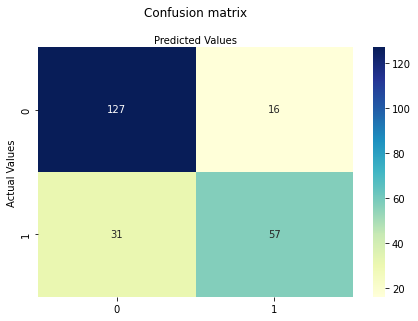

In [50]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
#131 = true negative
#57 true positive 
#31 false positive 
#16 false negative 

### call the Otto cycle technique
* if  the value is .5,that means its  the model is useless and the 1 is basically the perfect model

#### get the probabilities first

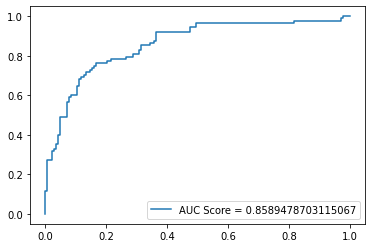

In [53]:
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ =  metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="AUC Score = "+str(auc))
plt.legend(loc=4)
plt.show()